<span style="font-size:36px"><b>Baseline Model Tutorial</b></span>

Copyright &copy; 2020 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [2]:
import sys

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
print("tf.__version__ = "+tf.__version__)

from gurih.models.model import BaselineASRModel
from gurih.data.data_generator import DataGenerator

%load_ext autoreload
%autoreload 2

tf.__version__ = 2.0.0


# Train Model

## Train using `fit_generator()`

In [8]:
audio_filename = "../../dataset/processed/bibleis_trimmed_splitted/INDASV_1CH_10_f000003.mp3"
txt = "keturunan gomer ialah askenas, difat dan togarma."
df = pd.DataFrame([[audio_filename, txt]], columns=["filename", "transcript"])

In [9]:
train_generator = DataGenerator(df, batch_size=1)

In [5]:
BaselineASR = BaselineASRModel(input_shape=(1254, 39), vocab_len=29)
BaselineASR.compile()

Model directory is set to ../../models/
Documentation directory is set to ../../docs/

Model: "BaselineASR_f200_k11_s2_pvalid_nlstm200_ndense29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, 1254, 39)]        0         
_________________________________________________________________
masking (Masking)            (None, 1254, 39)          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 622, 200)          86000     
_________________________________________________________________
bidirectional (Bidirectional (None, 622, 400)          641600    
_________________________________________________________________
the_output (TimeDistributed) (None, 622, 30)           12030     
Total params: 739,630
Trainable params: 739,630
Non-trainable params: 0
_________________________________________________________

In [10]:
BaselineASR.fit_generator(train_generator, epochs=2)

Epoch 1/2


TypeError: _getfullpathname: path should be string, bytes or os.PathLike, not int

In [11]:
tmp = train_generator[0]

TypeError: _getfullpathname: path should be string, bytes or os.PathLike, not int

In [153]:
inputs = tmp
ctc_loss, ctc_matrix = BaselineASR.predict(inputs[0])

In [154]:
char_map = {chr(i) : i - 96 for i in range(97, 123)}
char_map[" "] = 0
char_map["."] = 27
char_map[","] = 28
char_map["%"] = 29

In [155]:
index_to_char = {v: k for k, v in char_map.items()}

In [158]:
ctc_matrix[0].shape

(622, 30)

In [156]:
output_text = ""
for timestep in ctc_matrix:
    tmp = np.argmax(timestep, axis=1)
    output_text += ''.join(index_to_char[i] for i in tmp)
print(output_text)

keturunan gomer ialah askenas, ddddddiffat ddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddan togarma.


In [166]:
import tensorflow.keras.backend as K

In [170]:
ctc_decode = K.ctc_decode(
    ctc_matrix,
    [622],
    greedy=True,
    beam_width=100,
    top_paths=1
)

In [180]:
ctc_decode[0][0].numpy()[0]

array([11,  5, 20, 21, 18, 21, 14,  1, 14,  0,  7, 15, 13,  5, 18,  0,  9,
        1, 12,  1,  8,  0,  1, 19, 11,  5, 14,  1, 19, 28,  0,  4,  9,  6,
        1, 20,  0,  4,  1, 14,  0, 20, 15,  7,  1, 18, 13,  1, 27],
      dtype=int64)

In [181]:
output_text = ""
for t in ctc_decode[0][0].numpy()[0]:
    output_text += index_to_char[t]


In [182]:
output_text

'keturunan gomer ialah askenas, difat dan togarma.'

In [187]:
output_text == txt

True

## Train using `fit()`

In [4]:
import string

vocab = set(string.ascii_lowercase)
vocab |= {' ', '>'} # space_token, end_token
vocab_index = list(range(len(vocab)))

def create_inputs():                          
    X = np.array([[5 for x in range(39)] for y in range(300)])
    X = np.expand_dims(X, axis=0)
    y = np.random.choice(vocab_index, 100)
    y = np.expand_dims(y, axis=0)
    inputs = {'the_input': X,
              'the_labels': y,
              'input_length': np.array([145]),
              'label_length': np.array([28])}

    return inputs

def create_outputs():
    outputs = {'ctc': np.zeros([1])} # dummy data for dummy loss function
    
    return outputs

In [6]:
create_inputs()

{'the_input': array([[[5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5],
         ...,
         [5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5],
         [5, 5, 5, ..., 5, 5, 5]]]),
 'the_labels': array([[11, 23,  4,  0,  1, 13, 27, 21, 13, 13, 12,  4,  3, 14, 21,  0,
         17,  8,  7, 12,  5, 24, 14,  7,  5, 18, 15,  6, 14, 16, 16,  2,
         14, 25, 18,  1, 11, 21, 14, 25, 11, 10, 13, 16,  9,  7, 25, 27,
         16, 15,  0, 14,  2, 25,  4,  7, 26, 27, 15, 23, 12,  6, 22,  6,
         25, 12, 24,  4,  5, 12,  1,  4, 18, 13, 21, 14,  6, 13, 22, 15,
         14, 19, 11, 23, 21, 23,  6,  6, 23,  0,  1,  5, 23, 25, 25, 24,
          6, 19,  4,  6]]),
 'input_length': array([145]),
 'label_length': array([28])}

In [7]:
BaselineASR = BaselineASRModel(input_shape=(300, 39), vocab_len=len(vocab))

Model directory is set to ../../models/
Documentation directory is set to ../../docs/

Model: "BaselineASR_f200_k11_s2_pvalid_nlstm200_ndense28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, 300, 39)]         0         
_________________________________________________________________
masking (Masking)            (None, 300, 39)           0         
_________________________________________________________________
conv1 (Conv1D)               (None, 145, 200)          86000     
_________________________________________________________________
bidirectional (Bidirectional (None, 145, 400)          641600    
_________________________________________________________________
time_distributed (TimeDistri (None, 145, 29)           11629     
Total params: 739,229
Trainable params: 739,229
Non-trainable params: 0
_________________________________________________________

In [8]:
BaselineASR.compile()

Train on 1 samples
Epoch 1/10
1/1 [==============================] - 4s 4s/sample - loss: 396.2836
Epoch 2/10
1/1 [==============================] - 0s 186ms/sample - loss: 195.6797
Epoch 3/10
1/1 [==============================] - 0s 177ms/sample - loss: 151.4875
Epoch 4/10
1/1 [==============================] - 0s 170ms/sample - loss: 154.0769
Epoch 5/10
1/1 [==============================] - 0s 172ms/sample - loss: 146.1845
Epoch 6/10
1/1 [==============================] - 0s 165ms/sample - loss: 138.5098
Epoch 7/10
1/1 [==============================] - 0s 174ms/sample - loss: 136.5608
Epoch 8/10
1/1 [==============================] - 0s 166ms/sample - loss: 136.3115
Epoch 9/10
1/1 [==============================] - 0s 168ms/sample - loss: 133.6229
Epoch 10/10
1/1 [==============================] - 0s 174ms/sample - loss: 129.9147


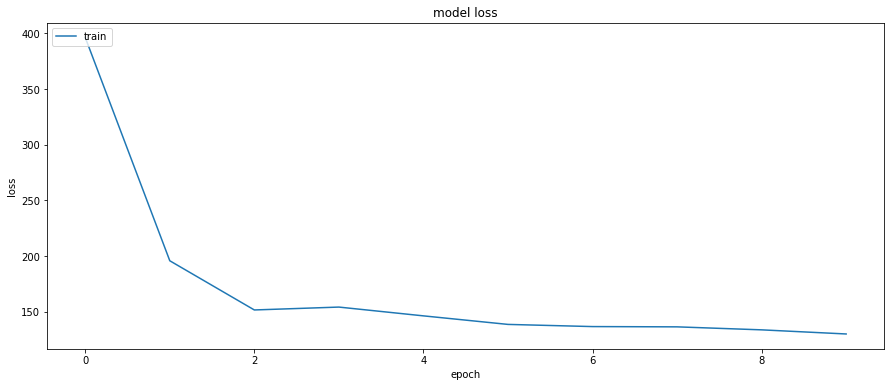

In [10]:
BaselineASR.fit(create_inputs(), create_outputs(), epochs=10)